PYTHON PACKAGE IMPORIUM

In [1]:
from sympy import *
import numpy as np
import pandas as pd
init_printing()
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter

Importing the real data and creating gradients

In [2]:
### Imports the data from the videos these are on google sheets

## Links for information
#Swing
# https://docs.google.com/spreadsheets/d/1_7QRQoNtSvBf8SGO_7QMUrW1H4530k6mT_Gq0PwPk5g/edit?usp=sharing


# Heel Strike
# https://docs.google.com/spreadsheets/d/1X28PZPv4YCRk0JKEC6BHRNPEU3d-jScm01EGPgLpGG0/edit?usp=sharing

# Foot plant
# https://docs.google.com/spreadsheets/d/1omfkgiZVONb8tLBRJC7OKSXqIFZG1T_8hXWkyYviHwc/edit?usp=sharing


# Toe Push off
# https://docs.google.com/spreadsheets/d/1WJXOAKJVESN-oYRf8KPlqSbBiQPxoxrlgLnAdw2M_7k/edit?usp=sharing


## Pandas needed code

## Swing

Sheet_ID_Swing = '1_7QRQoNtSvBf8SGO_7QMUrW1H4530k6mT_Gq0PwPk5g'
df_Swing = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{Sheet_ID_Swing}/export?format=csv")

## Heel Strike

Sheet_ID_HeelStrike = '1X28PZPv4YCRk0JKEC6BHRNPEU3d-jScm01EGPgLpGG0'
df_HeelStrike = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{Sheet_ID_HeelStrike}/export?format=csv")

## Foot plant

Sheet_ID_FootPlant = '1omfkgiZVONb8tLBRJC7OKSXqIFZG1T_8hXWkyYviHwc'
df_FootPlant = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{Sheet_ID_FootPlant}/export?format=csv")

## Toe Push off

Sheet_ID_ToePushOff = '1WJXOAKJVESN-oYRf8KPlqSbBiQPxoxrlgLnAdw2M_7k'
df_ToePushOff = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{Sheet_ID_ToePushOff}/export?format=csv")


In [3]:
## Adjusting time to be in seconds
df_Swing.iloc[:,0] = df_Swing.iloc[:,0]/1000
df_HeelStrike.iloc[:,0] = df_HeelStrike.iloc[:,0]/1000
df_FootPlant.iloc[:,0] = df_FootPlant.iloc[:,0]/1000
df_ToePushOff.iloc[:,0] = df_ToePushOff.iloc[:,0]/1000

C:\Users\lukeh\AppData\Local\Temp\ipykernel_32860\1619488405.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.000
1     0.035
2     0.068
3     0.102
4     0.136
5     0.170
6     0.204
7     0.238
8     0.272
9     0.306
10    0.340
11    0.374
12    0.407
13    0.441
14    0.484
15    0.517
16    0.550
17    0.617
18    0.650
19    0.684
20    0.709
Name: Time (ms), dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_Swing.iloc[:,0] = df_Swing.iloc[:,0]/1000
C:\Users\lukeh\AppData\Local\Temp\ipykernel_32860\1619488405.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.000
1     0.033
2     0.067
3     0.091
4     0.125
5     0.159
6     0.202
7     0.235
8     0.268
9     0.302
10    0.335
11    0.369
Name: Time (ms), dtype: float64' has dtype incompatible with int64,

Where the functions will live

In [4]:
def gradienter(func):
    func.iloc[:,2] = np.gradient(func.iloc[:,1] , func.iloc[:,0])# velocity
    func.iloc[:,3] = np.gradient(func.iloc[:,2] , func.iloc[:,0]) # Acceleration

    func.iloc[:,5] = np.gradient(func.iloc[:,4] , func.iloc[:,0])  # omega
    func.iloc[:,6] = np.gradient(func.iloc[:,5] , func.iloc[:,0])  # alpha

    

In [5]:
### Gradients all the data

gradienter(df_Swing)
gradienter(df_HeelStrike)
gradienter(df_FootPlant)
gradienter(df_ToePushOff)

C:\Users\lukeh\AppData\Local\Temp\ipykernel_32860\593550914.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.67714286 -1.52045837 -0.71688882  0.97941176  2.94264706  4.41911765
  5.06323529  4.96911765  4.35882353  3.48382353  2.57941176  1.7219105
  0.76146274 -0.30440244 -2.04672583 -3.60909091 -3.62755495 -3.00831253
 -2.71316679 -1.67305284 -1.424     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  func.iloc[:,2] = np.gradient(func.iloc[:,1] , func.iloc[:,0])# velocity
C:\Users\lukeh\AppData\Local\Temp\ipykernel_32860\593550914.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  4.47669977  14.70590918  36.93029147  53.81670407  50.58391003
  31.18512111   8.08823529 -10.35899654 -21.84256055 -26.16782007
 -25.91048571 -27.19153548 -30.20997672 -35.398143   -44.38080198
 -23.95195646   

In [6]:
## This is needed for functions
count = symbols('count')

DEFINE TIME AND GRAVITY

In [7]:
t = symbols('t')
g = symbols('g')

DEFINE THE BASE BASE VARIABLES

In [8]:
# limb lengths
l_1, l_2, l_3, l_4 = symbols('l_1, l_2, l_3, l_4')

# limb masses
m_1, m_2, m_3, m_A = symbols('m_1, m_2, m_3, m_A')

# joint stiffnesses
k_B, k_C = symbols('k_B, k_C')

# joint damping
b_B, b_C = symbols('b_B, b_C')

# joint neutral angles
psi_B, psi_C = symbols('psi_B, psi_C')

# foot angle
phi_D = symbols('phi_E')

# Walking speed
vel_W = symbols('v')

# Swing phase hip height
y_A_SW = Function('y_ASW')(t)

# Gravity
g = symbols('g')

DEFINE THE GENERALIZED COORDINATES

In [9]:
# limb orientations
theta_1 = Function('theta_1')(t)
theta_2 = Function('theta_2')(t)
theta_3 = Function('theta_3')(t)

# hip height
y = Function('y')(t) 

CALCULATE POSITIONS AND VELOCITIES

In [10]:
# rates of change
omega_1 = diff(theta_1,t)
omega_2 = diff(theta_2,t)
omega_3 = diff(theta_3,t) 
v = diff(y,t)

# heel angle
theta_4 = theta_3 - phi_D
omega_4 = diff(theta_4, t)

# joint positions
x_A = 0
y_A = y
x_B = x_A + l_1 * sin(theta_1)
y_B = y_A - l_1 * cos(theta_1)
x_C = x_B + l_2 * sin(theta_2)
y_C = y_B - l_2 * cos(theta_2)
x_D = x_C + l_4 * sin(theta_4)
y_D = y_C - l_4 * cos(theta_4)
x_E = x_C + l_4 * sin(theta_4)
y_E = y_C - l_4 * cos(theta_4)

# joint velocities
u_A = diff(x_A, t)
v_A = diff(y_A, t)
u_B = diff(x_B, t)
v_B = diff(y_B, t)
u_C = diff(x_C, t)
v_C = diff(y_C, t)
u_D = diff(x_D, t)
v_D = diff(y_D, t)
u_E = diff(x_E, t)
v_E = diff(y_E, t)

# Centers of masses
x_1 = x_A + l_1 * sin(theta_1) / 2
y_1 = y_A - l_1 * cos(theta_1) / 2
x_2 = x_B + l_2 * sin(theta_2) / 2
y_2 = y_B - l_2 * cos(theta_2) / 2
x_3 = x_C + l_3 * sin(theta_3) / 2
y_3 = y_C - l_3 * cos(theta_3) / 2

# COM velocities
u_1 = diff(x_1, t)
v_1 = diff(y_1, t)
u_2 = diff(x_2, t)
v_2 = diff(y_2, t)
u_3 = diff(x_3, t)
v_3 = diff(y_3, t)

In [11]:
#Alpha 
alpha_1 = diff(omega_1,t)
alpha_2 = diff(omega_2,t)
alpha_3 = diff(omega_3,t)
a = diff(v_A,t)


In [12]:
# Moments of inertia
I_1 = m_1 * l_1**2 / 12
I_2 = m_2 * l_2**2 / 12
I_3 = m_3 * l_3**2 / 12  ## FIX THIS

In [13]:
# Non-Holonomic lagrangian Multiplier

## HS
mu_1_HS = symbols('mu_1_HS')


Calculate Lagrangian

In [14]:
### LAGRANGIAN COMPONENTS complex
# Kinetic Energy
T = simplify((m_1 * (u_1**2 + v_1**2) / 2) + (m_2 * (u_2**2 + v_2**2) / 2) + m_3 * (u_3**2 + v_3**2) / 2 + (I_1 * omega_1**2 / 2) + (I_2 * omega_2**2 / 2)  + (I_3 * omega_3**2 / 2))

# Potential Energy
V = simplify(k_B * (theta_1 - theta_2 - psi_B)**2 / 2 + k_C * (theta_2 - theta_3 - psi_C)**2 / 2)

# Content
D =simplify( b_B * (omega_1 - omega_2)**2 / 2 + b_C * (omega_2 - omega_3)**2 / 2)

CONSTRAINT EQUATIONS

In [15]:
## Constraint equations ###

''' Notes: 
    - This is a section to lay out the constraints/define the "regiemes". I am wondering if for our analysis we should pull set this in a 
       for loop? By that I mean should it be have a matrix where time is the top row and we ha
       e a row for each theta. At every time interval 
       we have a measured theta. The below constraints then are only active over their "regieme" and apply to the analysis in their specified
       time domain?
    '''

# Swing

'''Notes:
      - This is the stage where the one leg is swinging while the other leg is standing up going through the cycle.
  
  '''

const_SW_y_A = y_A - y_A_SW


# Heel_Strike
'''Notes:
            - This is where heel strike contacts the gorund and jhas the following contraints
                - y_E = 0 
                - u_3 = 0
                - v_3 = 0 
                - y_D = ED*sin(theta3) This is inherent to the system will not be set

                Side: Note, should this be a for loop with a matrix? like for t = .1->.25 then have the HS constraints?
                   '''

const_HS_y_E = y_E
const_HS_u_E = u_E + vel_W


# Foot_Planted

'''Notes:
            - This is where the foot is "pulling" across the ground to push the body forward. As we have restricted Y to the 0,0
              position, the foot will be moving around it.
                - y_E = 0 due to the foot being on the ground
                - y_D = 0 due to the foot being on the gorund
                - v_3 = due to the foot not traveling upward 
                   '''

const_FP_y_E = y_E
const_FP_y_D = y_D
const_FP_u_E = u_E + vel_W
const_FP_u_D = u_D + vel_W

# Toe_Lift_Off
'''Notes:
            - This is where the toe is about to kick off of the ground. 
                - y_D = 0 due to the foot being on the gorund

'''

const_TLO_y_D = y_D
const_TLO_u_D = u_D + vel_W


SOLVING AND LINEARIZING THE CONSTRAINTS PER PHASE

In [16]:
### Swing
SOLVED_Y_const_SW_y_A = solve(const_SW_y_A, y)[0]


In [17]:
### HEEL STRIKE
Y_HS = solve(const_HS_y_E,y)[0]
omega_3HS = solve(const_HS_u_E, omega_3)[0]


In [18]:
### Foot plant constraints in terms of singel values

Y_FP = solve(const_FP_y_E,y)[0] # this get the foot position of E in terms of y
theta_2FP = simplify(solve(const_FP_y_D, theta_2)[0])
theta_2FP = theta_2FP.subs(y, Y_FP)
theta_2FP 
#omega_2_FP = simplify(solve(const_FP_u_E.subs(theta_2,theta_2FP),omega_2))# This omega 2 to define the velocity of E

In [19]:
### TOE_LIFT_OFF

Y_T_L_F_D = (solve(const_TLO_y_D,y))[0]
U_D_T_L_D = (solve(const_TLO_u_D.subs(y,Y_T_L_F_D),v)) ###UUHUHUUHHUHUHU

#const_TLO_y_D = y_D
#const_TLO_u_D = u_D + v

Equations of Motion for generalized coordinates (no constraints or efforts)
THIS IS THE WAY WE WERE DOING IT BEFORE

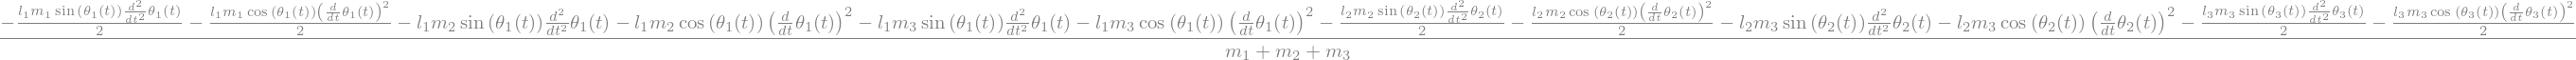

In [20]:
# y
ddydt = simplify(solve( (diff(diff(T, v_A), t) - diff(T, y) + diff(D, v_A) + diff(V, y)) , a, simplify=False, rational=False)[0])
ddydt

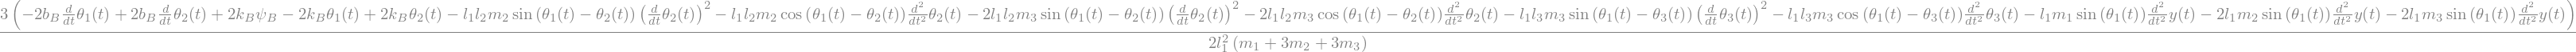

In [21]:
# theta_1
ddtheta_1_dt =  simplify(solve((diff(diff(T, omega_1), t) - diff(T, theta_1) + diff(D, omega_1) + diff(V, theta_1)), alpha_1, simplify=False, rational=False )[0])
ddtheta_1_dt

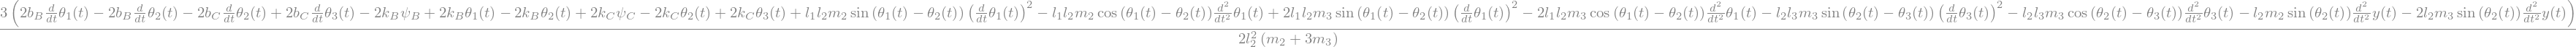

In [22]:
# theta_2
ddtheta_2_dt =  simplify(solve((diff(diff(T, omega_2), t) - diff(T, theta_2) + diff(D, omega_2) + diff(V, theta_2)), alpha_2, simplify=False, rational=False )[0])
ddtheta_2_dt


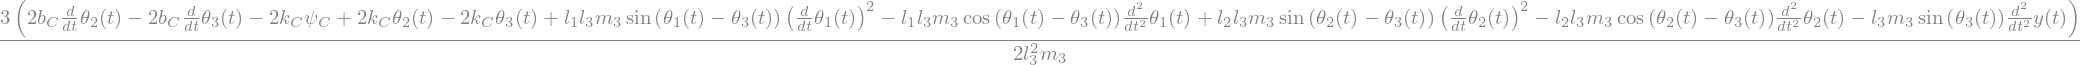

In [23]:
# theta_3
ddtheta_3_dt =  simplify(solve((diff(diff(T, omega_3), t) - diff(T, theta_3) + diff(D, omega_3) + diff(V, theta_3)), alpha_3, simplify=False, rational=False )[0])
ddtheta_3_dt


CREATION OF THE LEGRANGE EQUATIONS OF MOVEMENT AND THEY ARE "LAGRANGED" PER THE GENERALIZED EQUATIONS

In [24]:
### Creates the general equations of lagrange
LE_Y = simplify((diff(diff(T, v_A), t) - diff(T, y) + diff(D, v_A) + diff(V, y)))
LE_theta_1 = simplify((diff(diff(T, omega_1), t) - diff(T, theta_1) + diff(D, omega_1) + diff(V, theta_1)))
LE_theta_2 = simplify((diff(diff(T, omega_2), t) - diff(T, theta_2) + diff(D, omega_2) + diff(V, theta_2)))
LE_theta_3 = simplify((diff(diff(T, omega_3), t) - diff(T, theta_3) + diff(D, omega_3) + diff(V, theta_3)))


ADDING THE APPLIED EFFORTS

In [25]:
## Creating the applied efforts EQUATIONS PER PARTS

dw_A = -g * m_A * diff(y_A, t)
dw_1 = -g * m_1 * diff(y_1, t)
dw_2 = -g * m_2 * diff(y_2, t)
dw_3 = -g * m_3 * diff(y_3, t)
dw = simplify(dw_A + dw_1 + dw_2 + dw_3)


In [26]:
### PULLS OUT THE APPLIED EFFORTS SO THAT THEY CAN BE APPLIED TO THE CORRECT EQUATIONS OF MOTION

e_y = dw.subs({theta_1: 0,theta_2: 0, theta_3: 0, y: 1, omega_2: 0, omega_3: 0, v: 1, omega_1: 0})
e_thet1 = dw.subs({theta_2: 0, theta_3: 0, y: 0, omega_2: 0, omega_3: 0, v: 0, omega_1: 1})
e_thet2 = dw.subs({theta_1: 0, theta_3: 0, y: 0, omega_2: 1, omega_3: 0, v: 0, omega_1: 0})
e_thet3 = dw.subs({theta_1: 0,theta_2: 0,  y: 0, omega_2: 0, omega_3: 1, v: 0, omega_1: 0})


In [27]:
### Applies the efforts to the respective equation of motion

LE_Y_W = LE_Y - e_y
LE_theta_1_W = LE_theta_1 - e_thet1
LE_theta_2_W = LE_theta_2 - e_thet2
LE_theta_3_W = LE_theta_3 - e_thet3

Creates the equations of motion for Theta 2 and Theta 3

In [28]:
### THIS SOLVES THE EQUATIONS OF MOTION FOR THETA 2 AND THETA 3

'''   
NOTE:
This solves the EOMs for theta 2 and theta 3 so that they are independent of each other. This will put the other variables (that I have data for) in the equations.
'''

sols = simplify(solve([ (LE_theta_2_W), (LE_theta_3_W)], (alpha_2, alpha_3),
                    simplify=false, rational=False))

In [29]:
## Separates the solutions of the equation 
ddtheta_2_for_solve = sols[alpha_2]
ddtheta_3_for_solve = sols[alpha_3]

Creates the functions from the EOMS of theta 2 and Theta 3

In [30]:
### Lamdifying the new functions
''' this creates functions out of the LE_theta_2 (the angular acceleratiomn of the knee joint) and the LE_theta_3 ( the angular acceleration of the ankle)

'''
### Theta 2
ddtheta_2_for_solve_f = dz3dt =  lambdify([t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, m_3, l_2, g, l_1, theta_1,theta_2,theta_3, omega_1, omega_2, omega_3, a, alpha_1] ,ddtheta_2_for_solve,'numpy')

### Theta 3
ddtheta_3_for_solve_f = dz4dt = lambdify([t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, m_3, l_2, g, l_1,theta_1,theta_2,theta_3,omega_1,omega_2,omega_3,a,alpha_1] ,ddtheta_3_for_solve,'numpy')



Creates the needed data for the solver

In [31]:
## Time setup per stage

t_Swing = df_Swing.iloc[:,0]

t_HeelStrike = df_HeelStrike.iloc[:,0]

t_FootPlant = df_FootPlant.iloc[:,0]

t_ToePushOff = df_ToePushOff.iloc[:,0]


## funntions needed for the state space

omega_2_for_solver = lambdify(omega_2,omega_2,'numpy')
omega_3_for_solver = lambdify(omega_3,omega_3,'numpy')


## counter

count_for_solver = lambdify(count,count,'numpy')

THE SOLVERS Functions

In [32]:
## The one that works!!
### Swing DSDT

def DSdt_Swing(S, t, m_1, m_2, m_3, b_C, l_1, l_2, l_3, k_B, k_C, b_B, psi_B, psi_C, phi_D, g):
    global counter_dict  # Reference external counter
    
    counter_dict["counted"] += 1  # Increment persistently
    
    # **Clamp counted within valid row indices**
    counted = min(counter_dict["counted"], len(df_Swing) - 1)

    # Debugging print
    print(f"Attempting to access row {counted} of df_Swing (size={len(df_Swing)})")

    # Directly retrieve Y_val, z1, the1, and z2 from df_Swing
    Y_val = df_Swing.iloc[counted, 1]
    z1 = df_Swing.iloc[counted, 2]
    the1 = df_Swing.iloc[counted, 4]
    z2 = df_Swing.iloc[counted, 5]

    # Extract remaining values from S
    _, the2, z3, the3, z4 = S  # Ignore counted and previously extracted values

    ## The knee angle
    om2 = omega_2_for_solver(z3)
    alph2 = ddtheta_2_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_Swing.iloc[counted, 2], df_Swing.iloc[counted, 5])

    ## The ankle angle
    om3 = omega_3_for_solver(z4)
    alph3 = ddtheta_3_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_Swing.iloc[counted, 2], df_Swing.iloc[counted, 5])

    return [
        counted,  # Keeping track persistently
        om2,      # Omega of theta 2 from calculations
        alph2,    # Alpha of theta 2 from calculations
        om3,      # Omega of theta 3 from calculations
        alph3     # Alpha of theta 3 from calculations
    ]

In [33]:
### Heel Stike DSDT

def DSdt_HeelStrike(S, t, m_1, m_2, m_3, b_C, l_1, l_2, l_3, k_B, k_C, b_B, psi_B, psi_C, phi_D, g):
    global counter_dict  # Reference external counter
    
    counter_dict["counted"] += 1  # Increment persistently
    
    # **Clamp counted within valid row indices**
    counted = min(counter_dict["counted"], len(df_HeelStrike) - 1)

    # Debugging print
    print(f"Attempting to access row {counted} of df_HeelStrike (size={len(df_HeelStrike)})")

    # Directly retrieve Y_val, z1, the1, and z2 from df_HeelStrike
    Y_val = df_HeelStrike.iloc[counted, 1]
    z1 = df_HeelStrike.iloc[counted, 2]
    the1 = df_HeelStrike.iloc[counted, 4]
    z2 = df_HeelStrike.iloc[counted, 5]

    # Extract remaining values from S
    _, the2, z3, the3, z4 = S  # Ignore counted and previously extracted values

    ## The knee angle
    om2 = omega_2_for_solver(z3)
    alph2 = ddtheta_2_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_HeelStrike.iloc[counted, 2], df_HeelStrike.iloc[counted, 5])

    ## The ankle angle
    om3 = omega_3_for_solver(z4)
    alph3 = ddtheta_3_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_HeelStrike.iloc[counted, 2], df_HeelStrike.iloc[counted, 5])

    return [
        counted,  # Keeping track persistently
        om2,      # Omega of theta 2 from calculations
        alph2,    # Alpha of theta 2 from calculations
        om3,      # Omega of theta 3 from calculations
        alph3     # Alpha of theta 3 from calculations
    ]

In [34]:
### FootSweep DSDT

def DSdt_FootPlant(S, t, m_1, m_2, m_3, b_C, l_1, l_2, l_3, k_B, k_C, b_B, psi_B, psi_C, phi_D, g):
    global counter_dict  # Reference external counter
    
    counter_dict["counted"] += 1  # Increment persistently
    
    # **Clamp counted within valid row indices**
    counted = min(counter_dict["counted"], len(df_FootPlant) - 1)

    # Debugging print
    print(f"Attempting to access row {counted} of df_FootPlant (size={len(df_FootPlant)})")

    # Directly retrieve Y_val, z1, the1, and z2 from df_FootPlant
    Y_val = df_FootPlant.iloc[counted, 1]
    z1 = df_FootPlant.iloc[counted, 2]
    the1 = df_FootPlant.iloc[counted, 4]
    z2 = df_FootPlant.iloc[counted, 5]

    # Extract remaining values from S
    _, the2, z3, the3, z4 = S  # Ignore counted and previously extracted values

    ## The knee angle
    om2 = omega_2_for_solver(z3)
    alph2 = ddtheta_2_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_FootPlant.iloc[counted, 2], df_FootPlant.iloc[counted, 5])

    ## The ankle angle
    om3 = omega_3_for_solver(z4)
    alph3 = ddtheta_3_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_FootPlant.iloc[counted, 2], df_FootPlant.iloc[counted, 5])

    return [
        counted,  # Keeping track persistently
        om2,      # Omega of theta 2 from calculations
        alph2,    # Alpha of theta 2 from calculations
        om3,      # Omega of theta 3 from calculations
        alph3     # Alpha of theta 3 from calculations
    ]

In [35]:
### ToePushoff DSDT

def DSdt_ToePushOff(S, t, m_1, m_2, m_3, b_C, l_1, l_2, l_3, k_B, k_C, b_B, psi_B, psi_C, phi_D, g):
    global counter_dict  # Reference external counter
    
    counter_dict["counted"] += 1  # Increment persistently
    
    # **Clamp counted within valid row indices**
    counted = min(counter_dict["counted"], len(df_ToePushOff) - 1)

    # Debugging print
    print(f"Attempting to access row {counted} of df_ToePushOff (size={len(df_ToePushOff)})")

    # Directly retrieve Y_val, z1, the1, and z2 from df_ToePushOff
    Y_val = df_ToePushOff.iloc[counted, 1]
    z1 = df_ToePushOff.iloc[counted, 2]
    the1 = df_ToePushOff.iloc[counted, 4]
    z2 = df_ToePushOff.iloc[counted, 5]

    # Extract remaining values from S
    _, the2, z3, the3, z4 = S  # Ignore counted and previously extracted values

    ## The knee angle
    om2 = omega_2_for_solver(z3)
    alph2 = ddtheta_2_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_ToePushOff.iloc[counted, 2], df_ToePushOff.iloc[counted, 5])

    ## The ankle angle
    om3 = omega_3_for_solver(z4)
    alph3 = ddtheta_3_for_solve_f(t, m_2, k_B, k_C, b_B, psi_B, l_3, b_C, psi_C, 
                                  m_3, l_2, g, l_1, the1, the2, the3, z1, z2, z3, 
                                  df_ToePushOff.iloc[counted, 2], df_ToePushOff.iloc[counted, 5])

    return [
        counted,  # Keeping track persistently
        om2,      # Omega of theta 2 from calculations
        alph2,    # Alpha of theta 2 from calculations
        om3,      # Omega of theta 3 from calculations
        alph3     # Alpha of theta 3 from calculations
    ]

The Solving

In [36]:
## ODE swing solving
m_1 = 30
m_2 = 10
m_3 = 5
l_1 = 18
l_2 = 10
l_3 = 6
l_4 = 2
k_B = 2500
k_c = 37
b_B = 3
c_B = 3
psi_B = -50
psi_C = -70
phi_D = 30
k_C = 2150
b_C = 255
g = 32.2

counter_dict = {"counted": 0}
ans_Swing = odeint(DSdt_Swing, t = t_Swing, y0 = [0, -54.1 ,0 ,37.2 , 0], args=( m_1, m_2, m_3, b_C , l_1, l_2, l_3, k_B, k_C, b_B, psi_B,psi_C, phi_D, g))

Attempting to access row 1 of df_Swing (size=21)
Attempting to access row 2 of df_Swing (size=21)
Attempting to access row 3 of df_Swing (size=21)
Attempting to access row 4 of df_Swing (size=21)
Attempting to access row 5 of df_Swing (size=21)
Attempting to access row 6 of df_Swing (size=21)
Attempting to access row 7 of df_Swing (size=21)
Attempting to access row 8 of df_Swing (size=21)
Attempting to access row 9 of df_Swing (size=21)
Attempting to access row 10 of df_Swing (size=21)
Attempting to access row 11 of df_Swing (size=21)
Attempting to access row 12 of df_Swing (size=21)
Attempting to access row 13 of df_Swing (size=21)
Attempting to access row 14 of df_Swing (size=21)
Attempting to access row 15 of df_Swing (size=21)
Attempting to access row 16 of df_Swing (size=21)
Attempting to access row 17 of df_Swing (size=21)
Attempting to access row 18 of df_Swing (size=21)
Attempting to access row 19 of df_Swing (size=21)
Attempting to access row 20 of df_Swing (size=21)
Attemptin

In [37]:
## ODE heel strike solving
m_1 = 30
m_2 = 10
m_3 = 5
l_1 = 18
l_2 = 10
l_3 = 6
l_4 = 2
k_B = 5000
k_c = 37
b_B = 3
c_B = 3
psi_B = 45
psi_C = -70
phi_D = 30
k_C = 2150
b_C = 255
g = 32.2

counter_dict = {"counted": 0}
ans_HeelStrike = odeint(DSdt_HeelStrike, t = t_HeelStrike, y0 = [0, -.5 ,0 ,13 , 0], args=( m_1, m_2, m_3, b_C , l_1, l_2, l_3, k_B, k_C, b_B, psi_B,psi_C, phi_D, g))

Attempting to access row 1 of df_HeelStrike (size=12)
Attempting to access row 2 of df_HeelStrike (size=12)
Attempting to access row 3 of df_HeelStrike (size=12)
Attempting to access row 4 of df_HeelStrike (size=12)
Attempting to access row 5 of df_HeelStrike (size=12)
Attempting to access row 6 of df_HeelStrike (size=12)
Attempting to access row 7 of df_HeelStrike (size=12)
Attempting to access row 8 of df_HeelStrike (size=12)
Attempting to access row 9 of df_HeelStrike (size=12)
Attempting to access row 10 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to access row 11 of df_HeelStrike (size=12)
Attempting to acces

In [38]:
## ODE foot plant solving
m_1 = 30
m_2 = 10
m_3 = 5
l_1 = 18
l_2 = 10
l_3 = 6
l_4 = 2
k_B = 5000
k_c = 37
b_B = 3
c_B = 3
psi_B = 45
psi_C = -70
phi_D = 30
k_C = 2150
b_C = 255
g = 32.2

counter_dict = {"counted": 0}
ans_FootPlant = odeint(DSdt_FootPlant, t = t_FootPlant, y0 = [0 , -3 ,0 ,70 , 0], args=( m_1, m_2, m_3, b_C , l_1, l_2, l_3, k_B, k_C, b_B, psi_B,psi_C, phi_D, g))

Attempting to access row 1 of df_FootPlant (size=26)
Attempting to access row 2 of df_FootPlant (size=26)
Attempting to access row 3 of df_FootPlant (size=26)
Attempting to access row 4 of df_FootPlant (size=26)
Attempting to access row 5 of df_FootPlant (size=26)
Attempting to access row 6 of df_FootPlant (size=26)
Attempting to access row 7 of df_FootPlant (size=26)
Attempting to access row 8 of df_FootPlant (size=26)
Attempting to access row 9 of df_FootPlant (size=26)
Attempting to access row 10 of df_FootPlant (size=26)
Attempting to access row 11 of df_FootPlant (size=26)
Attempting to access row 12 of df_FootPlant (size=26)
Attempting to access row 13 of df_FootPlant (size=26)
Attempting to access row 14 of df_FootPlant (size=26)
Attempting to access row 15 of df_FootPlant (size=26)
Attempting to access row 16 of df_FootPlant (size=26)
Attempting to access row 17 of df_FootPlant (size=26)
Attempting to access row 18 of df_FootPlant (size=26)
Attempting to access row 19 of df_Foo

C:\Users\lukeh\AppData\Local\Temp\ipykernel_32860\180854108.py:21: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  ans_FootPlant = odeint(DSdt_FootPlant, t = t_FootPlant, y0 = [0 , -3 ,0 ,70 , 0], args=( m_1, m_2, m_3, b_C , l_1, l_2, l_3, k_B, k_C, b_B, psi_B,psi_C, phi_D, g))


In [39]:
## ODE Toe Push off solving
m_1 = 30
m_2 = 10
m_3 = 5
l_1 = 18
l_2 = 10
l_3 = 6
l_4 = 2
k_B = 5000
k_c = 37
b_B = 3
c_B = 3
psi_B = 45
psi_C = -70
phi_D = 30
k_C = 2150
b_C = 255
g = 32.2

counter_dict = {"counted": 0}
ans_ToePushOff = odeint(DSdt_ToePushOff, t = t_ToePushOff, y0 = [0 , -44 ,0 , 4 , 0], args=( m_1, m_2, m_3, b_C , l_1, l_2, l_3, k_B, k_C, b_B, psi_B,psi_C, phi_D, g))

Attempting to access row 1 of df_ToePushOff (size=8)
Attempting to access row 2 of df_ToePushOff (size=8)
Attempting to access row 3 of df_ToePushOff (size=8)
Attempting to access row 4 of df_ToePushOff (size=8)
Attempting to access row 5 of df_ToePushOff (size=8)
Attempting to access row 6 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (size=8)
Attempting to access row 7 of df_ToePushOff (s

Creates x and Y coordinates for each phase by using "The Coordinator"

In [40]:
def coordinator(t, y, theta1, theta2 , theta3, l1 , l2 , l3 , l4 ):
    print(theta1)
    return [
        #A coordinates
        0*y, # A_x
        y, #A_y

        #B coordinates
        l1*np.sin(np.deg2rad(theta1)),   #B_x
        y - l1*np.cos(np.deg2rad(theta1)),   #B_y
        

        #C coordinates
        l2*np.sin(np.deg2rad(theta2)) + l1*np.sin(np.deg2rad(theta1)),   #C_x
        y -l1*np.cos(np.deg2rad(theta1)) - l2*np.cos(np.deg2rad(theta2)) ,   #C_y 

        #D coordinates
        l3*np.sin(np.deg2rad(theta3)) + l2*np.sin(np.deg2rad(theta2)) + l1*np.sin(np.deg2rad(theta1)),   #D_x
        y -l1*np.cos(np.deg2rad(theta1)) - l2*np.cos(np.deg2rad(theta2)) - l3*np.cos(np.deg2rad(theta3)),  #D_y    

        #E coordinates
        l4*np.sin(np.deg2rad(phi_D - theta3)) + l2*np.sin(np.deg2rad(theta2)) + l1*np.sin(np.deg2rad(theta1)),   #E_x
        y -l1*np.cos(np.deg2rad(theta1)) - l2*np.cos(np.deg2rad(theta2)) - l4*np.cos(np.deg2rad( phi_D- theta3)),   #E_y  

    ]

In [41]:
## Swing phase

A_x_Swing, A_y_Swing, B_x_Swing, B_y_Swing, C_x_Swing, C_y_Swing, D_x_Swing, D_y_Swing, E_x_Swing, E_y_Swing   = coordinator(t_Swing, df_Swing.iloc[:,1], df_Swing.iloc[:,4], ans_Swing[:,1],ans_Swing[:,3], 18, 15 , 6 , 3  )

0    -12.287070
1     -9.663365
2     -6.986897
3     -4.311443
4     -1.769453
5      0.548400
6      2.647610
7      4.594430
8      6.447870
9      8.223520
10     9.883430
11    11.335600
12    12.457200
13    13.147200
14    13.411200
15    13.459700
16    13.644300
17    14.111900
18    14.558400
19    14.497100
20    13.727600
Name: Theta 1, dtype: float64


In [42]:
## Heel Strike Phase

A_x_HS, A_y_HS, B_x_HS, B_y_HS, C_x_HS, C_y_HS, D_x_HS, D_y_HS, E_x_HS, E_y_HS   = coordinator(t_HeelStrike, df_HeelStrike.iloc[:,1], df_HeelStrike.iloc[:,4], ans_HeelStrike[:,1],ans_HeelStrike[:,3], 18, 15 , 6 , 3  )

0     14.67860
1     15.30960
2     15.38990
3     14.70220
4     13.42930
5     11.91280
6     10.36340
7      8.78654
8      7.11473
9      5.36500
10     3.63872
11     1.98154
Name: Heel StrikeTheta 1, dtype: float64


In [43]:
## Foot plant phase

A_x_FP, A_y_FP, B_x_FP, B_y_FP, C_x_FP, C_y_FP, D_x_FP, D_y_FP, E_x_FP, E_y_FP   = coordinator(t_FootPlant, df_FootPlant.iloc[:,1], df_FootPlant.iloc[:,4], ans_FootPlant[:,1],ans_FootPlant[:,3], 18, 15 , 6 , 3  )

D_y_FP[:] = 0
E_y_FP[:] = 0

0     13.732500
1     12.456200
2     11.025000
3      9.571140
4      8.028810
5      6.366670
6      4.652240
7      2.954700
8      1.310250
9     -0.237511
10    -1.627426
11    -2.795110
12    -3.711583
13    -4.458701
14    -5.199351
15    -6.032284
16    -6.970349
17    -8.018099
18    -9.139273
19   -10.233810
20   -11.242230
21   -12.198550
22   -13.157070
23   -14.118740
24   -15.050700
25   -15.950820
Name: Foot Plant theta 1, dtype: float64


In [44]:
## Toe Push Off phase

A_x_TPO, A_y_TPO, B_x_TPO, B_y_TPO, C_x_TPO, C_y_TPO, D_x_TPO, D_y_TPO, E_x_TPO, E_y_TPO   = coordinator(t_FootPlant, df_ToePushOff.iloc[:,1], df_ToePushOff.iloc[:,4], ans_ToePushOff[:,1],ans_ToePushOff[:,3], 18, 15 , 6 , 3  )


0   -17.335170
1   -17.877780
2   -18.468510
3   -18.401500
4   -17.404200
5   -14.998680
6   -12.233650
7    -8.961708
Name: Toe Push off Theta 1, dtype: float64


Collects the data in one place

In [45]:
### collects the thetas into one list
t_total = np.concatenate((ans_Swing[:,0], ans_HeelStrike[:,0], ans_FootPlant[:,0], ans_ToePushOff[:,0]), axis=0)
T_linspace = np.linspace(0,1,len(t_total))
Theta1_total = np.concatenate((df_Swing.iloc[:,4], df_HeelStrike.iloc[:,4], df_FootPlant.iloc[:,4], df_ToePushOff.iloc[:,4]), axis=0)
Theta2_total = np.concatenate((ans_Swing[:,1], ans_HeelStrike[:,1], ans_FootPlant[:,1], ans_ToePushOff[:,1]), axis=0)
Theta3_total = np.concatenate((ans_Swing[:,3], ans_HeelStrike[:,3], ans_FootPlant[:,3], ans_ToePushOff[:,3]), axis=0)



Theta1_total_3_cycle = np.concatenate((Theta1_total,Theta1_total,Theta1_total), axis=0)
T_linspace = np.linspace(0,1,len(Theta1_total_3_cycle))
Theta2_total_3_cycle = np.concatenate((Theta2_total,Theta2_total,Theta2_total), axis=0)
Theta3_total_3_cycle = np.concatenate((Theta3_total,Theta3_total,Theta3_total), axis=0)

Angle chart over these seem wrong but the animations seem good?

Text(0.5, 1.0, 'theta 3')

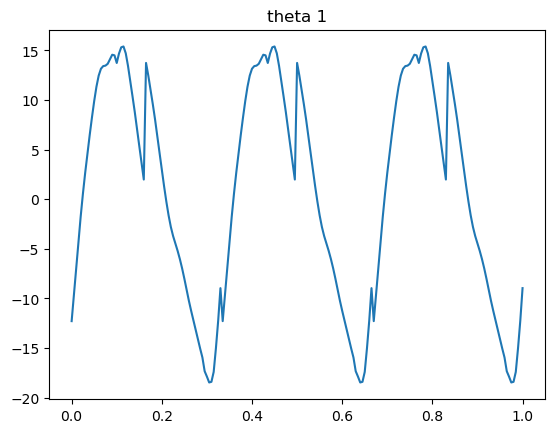

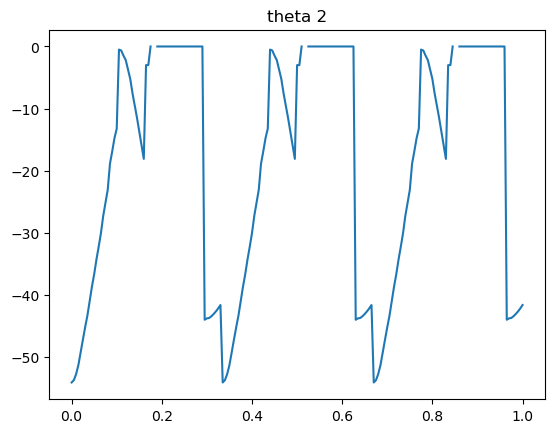

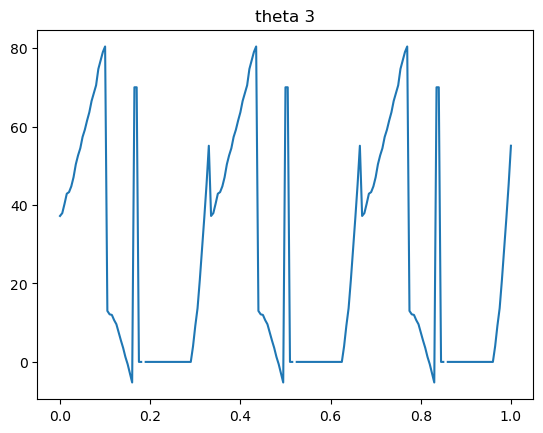

In [46]:
plt.plot(T_linspace,Theta1_total_3_cycle)
plt.title('theta 1')
plt.figure()
plt.plot(T_linspace,Theta2_total_3_cycle)
plt.title('theta 2')
plt.figure()
plt.plot(T_linspace,Theta3_total_3_cycle)
plt.title('theta 3')

ANIMATORS!!!

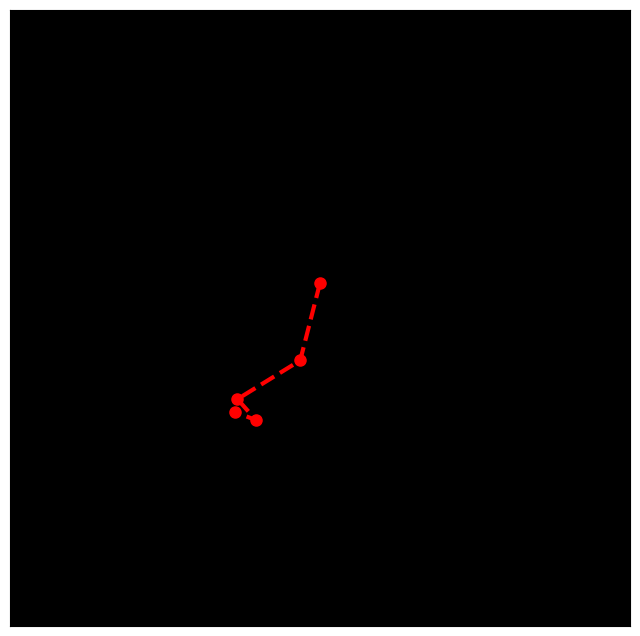

In [47]:
## Animates the swing
def animate_Swing(i):
    ln1.set_data([A_x_Swing[i], B_x_Swing[i], C_x_Swing[i], D_x_Swing[i], E_x_Swing[i]] ,  [A_y_Swing[i], B_y_Swing[i] ,   C_y_Swing[i], D_y_Swing[i], E_y_Swing[i]])
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-40,100)
ax.set_xlim(-60,60)
ani = animation.FuncAnimation(fig, animate_Swing, frames=18, interval=17, blit=False)
ani.save('Swing.gif',writer='pillow',fps=10)
HTML(ani.to_jshtml())

    

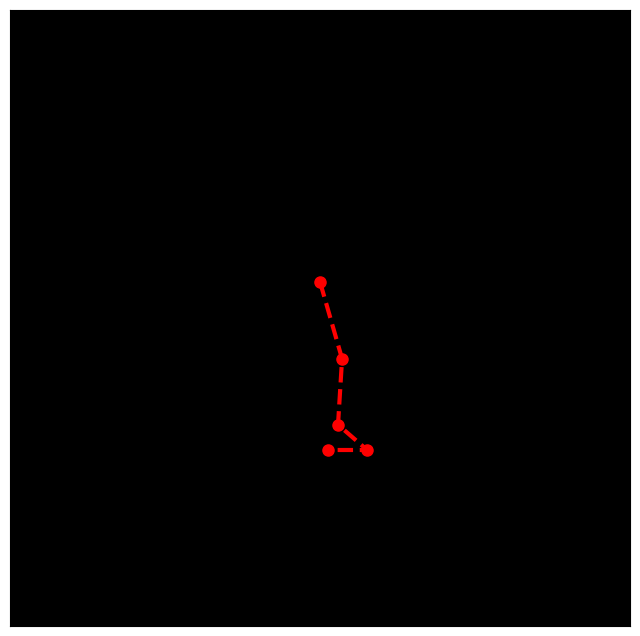

In [48]:
## Animates the Foot Plant
def animate_FootPlant(i):
    ln1.set_data([A_x_FP[i], B_x_FP[i], C_x_FP[i], D_x_FP[i], E_x_FP[i]] ,  [A_y_FP[i], B_y_FP[i] ,   C_y_FP[i], D_y_FP[i], E_y_FP[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-40,100)
ax.set_xlim(-60,60)
ani = animation.FuncAnimation(fig, animate_FootPlant, frames=18, interval=200, blit=False)
ani.save('FootPlant.gif',writer='pillow',fps=10)
HTML(ani.to_jshtml())


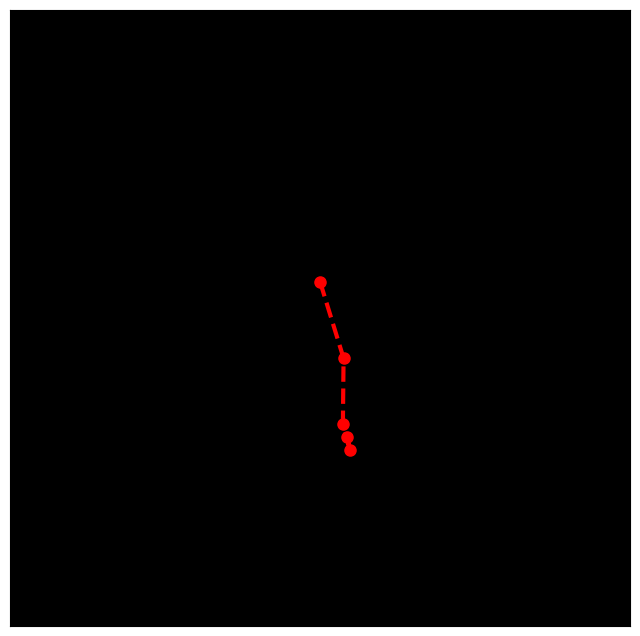

In [49]:
## Animates the Heel Strike
def animate_HeelStrike(i):
    ln1.set_data([A_x_HS[i], B_x_HS[i], C_x_HS[i], D_x_HS[i], E_x_HS[i]] ,  [A_y_HS[i], B_y_HS[i] ,   C_y_HS[i], D_y_HS[i], E_y_HS[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-40,100)
ax.set_xlim(-60,60)
ani = animation.FuncAnimation(fig, animate_HeelStrike, frames=10, interval=10, blit=False)
ani.save('HeelStrike.gif',writer='pillow',fps=10)
HTML(ani.to_jshtml())

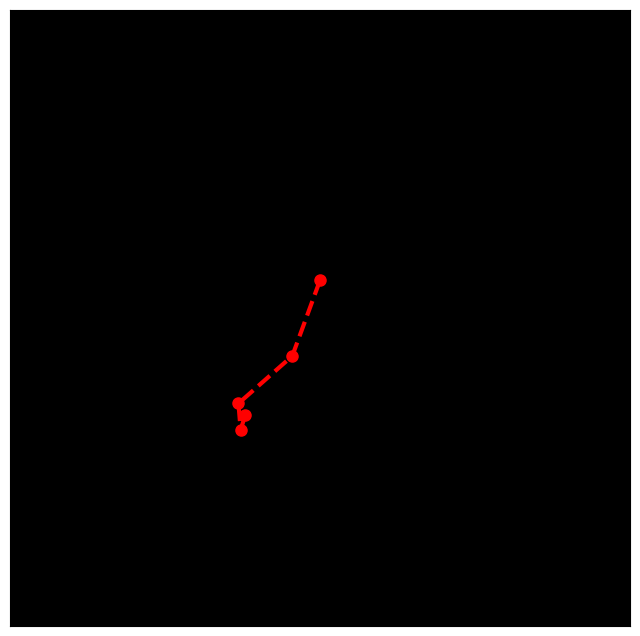

In [50]:
## Animates the Toe Push Off
def animate_ToePushOff(i):
    ln1.set_data([A_x_TPO[i], B_x_TPO[i], C_x_TPO[i], D_x_TPO[i], E_x_TPO[i]] ,  [A_y_TPO[i], B_y_TPO[i] ,   C_y_TPO[i], D_y_TPO[i], E_y_TPO[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-40,100)
ax.set_xlim(-60,60)
ani = animation.FuncAnimation(fig, animate_ToePushOff, frames=8, interval=9, blit=False)
ani.save('ToePushOff.gif',writer='pillow',fps=10)
HTML(ani.to_jshtml())

NON HOLONOMIC

Collects the four stages and animates

In [51]:
### Creates the stages of walking all together for animation
T_linspace = np.linspace(0,1,len(t_total))

# Version with A variables
Total_Ax_Total = np.concatenate((A_x_Swing, A_x_HS, A_x_FP, A_x_TPO), axis = 0)
Total_Ay_Total = np.concatenate((A_y_Swing, A_y_HS, A_y_FP, A_y_TPO), axis = 0)

# Version with B variables
Total_Bx_Total = np.concatenate((B_x_Swing, B_x_HS, B_x_FP, B_x_TPO), axis = 0)
Total_By_Total = np.concatenate((B_y_Swing, B_y_HS, B_y_FP, B_y_TPO), axis = 0)

# Version with C variables
Total_Cx_Total = np.concatenate((C_x_Swing, C_x_HS, C_x_FP, C_x_TPO), axis=0)
Total_Cy_Total = np.concatenate((C_y_Swing, C_y_HS, C_y_FP, C_y_TPO), axis=0)

# Version with D variables
Total_Dx_Total = np.concatenate((D_x_Swing, D_x_HS, D_x_FP, D_x_TPO), axis=0)
Total_Dy_Total = np.concatenate((D_y_Swing, D_y_HS, D_y_FP, D_y_TPO), axis=0)

# Version with E variables
Total_Ex_Total = np.concatenate((E_x_Swing, E_x_HS, E_x_FP, E_x_TPO), axis=0)
Total_Ey_Total = np.concatenate((E_y_Swing, E_y_HS, E_y_FP, E_y_TPO), axis=0)




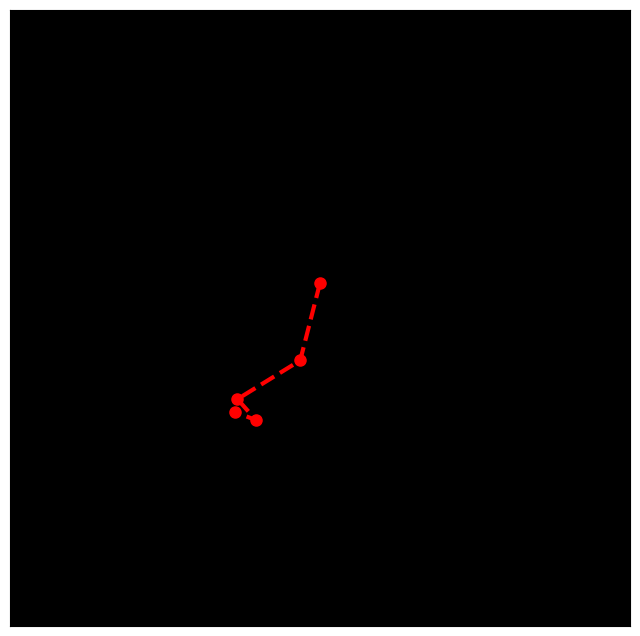

In [52]:
def animate_Full(i):
    ln1.set_data(
        [Total_Ax_Total[i], Total_Bx_Total[i], Total_Cx_Total[i], Total_Dx_Total[i], Total_Ex_Total[i]],  
        [Total_Ay_Total[i], Total_By_Total[i], Total_Cy_Total[i], Total_Dy_Total[i], Total_Ey_Total[i]]
    )

# Setup figure and axes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])  # Hide x-axis ticks
ax.get_yaxis().set_ticks([])  # Hide y-axis ticks

# Initialize empty plots
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)

# Set axis limits
ax.set_ylim(-40, 100)
ax.set_xlim(-60, 60)

# Create animation
ani = animation.FuncAnimation(fig, animate_Full, frames=len(Total_Ax_Total), interval=17, blit=False)

# Save as GIF
ani.save('full.gif', writer='pillow', fps=10)

# Display animation
HTML(ani.to_jshtml())


In [53]:
const_HS_y_E = y_E
const_HS_u_E = u_E + vel_W

In [54]:
### Creating Non Holonomic for Hs
A_HS = [0, -u_B, -(u_C-u_B), -(u_E-u_C)]
symbols_HS = [y, theta_1, theta_2, theta_3]
dsymbols_HS = [v_A, omega_1, omega_2, omega_3]


NH_HS_equations =[0,0,0,0,0]

for better in range (0,np.size(NH_HS_equations)):
    
    NH_HS_equations[better] = simplify(diff(diff(T, dsymbols_FP[better]), t) - diff(T, symbols_FP[better]) + diff(D, dsymbols_FP[better]) + diff(V, symbols_FP[better])
                                       
    + lam_FP_1*diff(const_FP_y_E,symbols_FP[better]) + lam_FP_2*diff(const_FP_y_D,symbols_FP[better]) + lam_FP_3*diff(const_FP_u_E,symbols_FP[better]) + lam_FP_4*diff(const_FP_u_D,symbols_FP[better]))
    




NameError: name 'dsymbols_FP' is not defined